<a href="https://colab.research.google.com/github/Karasiari/Graphs/blob/main/ClearingReduced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install "git+https://github.com/Karasiari/HuGraphFinal.git"

  Cloning https://github.com/Karasiari/HuGraphFinal.git to /tmp/pip-req-build-qc2f6a0p
  Running command git clone --filter=blob:none --quiet https://github.com/Karasiari/HuGraphFinal.git /tmp/pip-req-build-qc2f6a0p
  Resolved https://github.com/Karasiari/HuGraphFinal.git to commit 329bfda8a63cb14dd4479c1d8b685a6da80175c8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hugraphfin: filename=hugraphfin-0.1.0-py3-none-any.whl size=67739 sha256=9dffd46cf3d5b8cad541d2c34a1f66047e4f8d437162ecd22029df2d8ec7f1e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-g47_6ljd/wheels/46/83/89/572a6db8e6320eb877bf6ced236fa61f993538a12c5e43c72e
Successfully built hugraphfin


In [2]:
from graph_exps.exp_reduced import *
from graph_exps.traffic_generation.generation_for_exp import generate_own_traffic
from graph_exps.SNRBA_generation.generation import generate_snr_ba_graph

import matplotlib.pyplot as plt
import seaborn as sns
import copy

def small_test_table(num_tests: int):
  all_dfs = []
  available_demand_volumes = ((1, 0.9), (2, 0.1))
  capacity_value = 80.0
  allocation_types = ['alpha', 'random', 'alpha_mid_random', 'alpha_high_random']

  num_vertices = 35
  for i in range(num_tests):
    additional_resources = [capacity_value] * (num_vertices // 10)
    snr_ba_graph = generate_snr_ba_graph(num_nodes=num_vertices, capacity_value=capacity_value, random_seed=42+i)

    adj_graph_alpha, traffic_graph_alpha =  generate_own_traffic(
    snr_ba_graph,
    available_demand_volumes,
    generation_type="alpha_with_sa",
    generation_params={"alpha_target": 0.35, "epsilon": 0.025, "median_weight_for_initial": 20, "var_for_initial": 1, "multi_max": 5, "t": 0.5}
    )
    graph_for_exp_alpha = HuGraphForExps(adj_graph_alpha, traffic_graph_alpha)

    results_alpha = reduced_expand_test_for_graph(
        graph=graph_for_exp_alpha,
        additional_resources=additional_resources,
        allocation_types=allocation_types,
        tries_for_allocation=4,
        epsilon=1.2,
        available_volumes=available_demand_volumes,
        random_seed=42
    )
    #num_vertices += 10
    df = results_alpha.copy()
    df['experiment'] = f'exp_{i}'
    df['type'] = df.index.get_level_values(0)
    final_df = df[['experiment', 'type','rerouted volume ratio']].copy()
    all_dfs.append(final_df.copy())
  return all_dfs

def visualise_test(all_dfs):
  # Объединяем все DataFrame
  combined_df = pd.concat(all_dfs, ignore_index=False)

  # Считаем средние по типам для каждого эксперимента
  average_ratio_by_type_exp = combined_df.groupby(['experiment', 'type'])['rerouted volume ratio'].mean().reset_index()

  # Строим график
  plt.figure(figsize=(12, 8))
  sns.lineplot(data=average_ratio_by_type_exp, x='experiment', y='rerouted volume ratio', hue='type', marker='o')
  plt.title('Среднее rerouted volume ratio по типам для разных экспериментов')
  plt.xlabel('Эксперимент')
  plt.ylabel('Среднее rerouted volume ratio')
  plt.xticks(rotation=45)
  plt.grid(True, alpha=0.3)
  plt.legend(title='Тип распределения ресурсов')
  plt.tight_layout()
  plt.show()

In [ ]:
results_alpha = small_test_table(8)

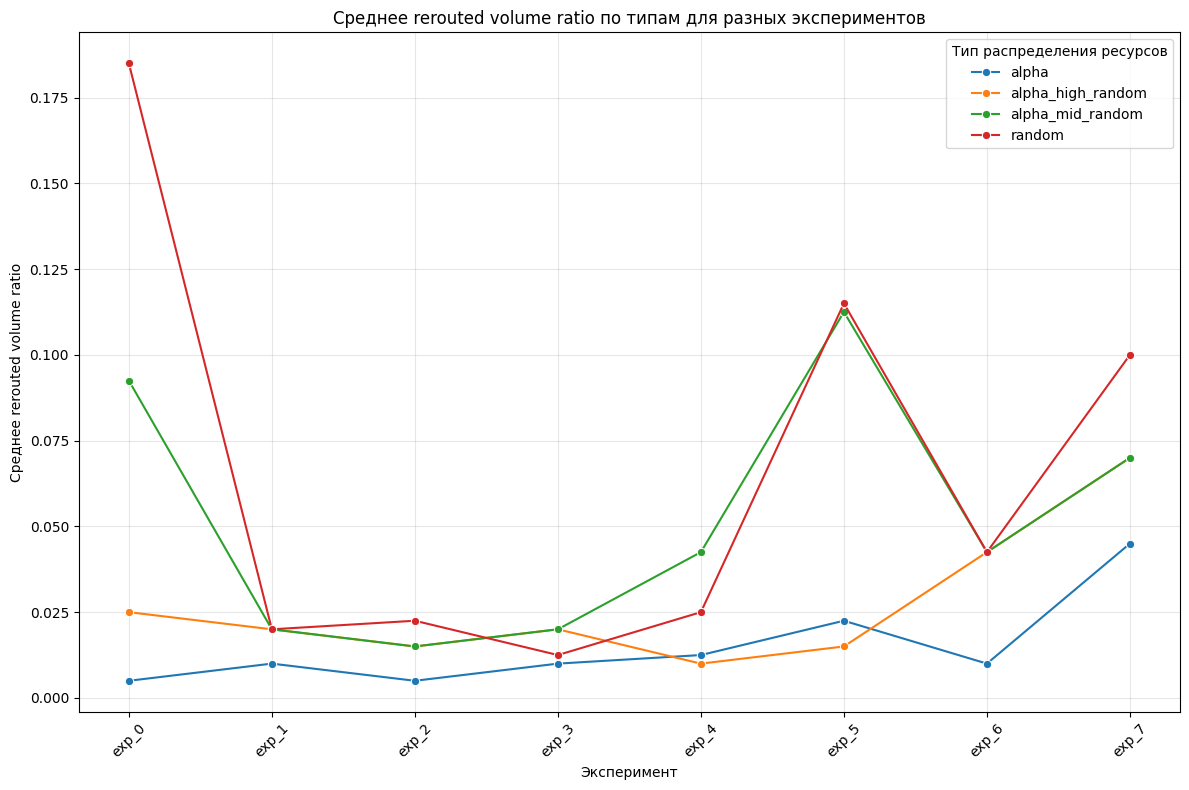

In [4]:
visualise_test(results_alpha)